In [1]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [2]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('../images') if isfile(join('../images', f))])

In [4]:
def bound_box(image_path):
    # load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    """print(image.shape)
    plt.imshow(gray, 'gray')"""

    # Find contours
    kernel_horizontal_derivative = 1/4 * np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    image_horizontal_derivative = cv2.filter2D(gray, -1, kernel_horizontal_derivative)
    image_horizontal_derivative = np.abs(image_horizontal_derivative)
    kernel_vertical_derivative = 1/4 * np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    image_vertical_derivative = cv2.filter2D(gray, -1, kernel_vertical_derivative)
    image_vertical_derivative = np.abs(image_vertical_derivative)

    image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

    """plt.figure()
    plt.imshow(image_horizontal_derivative, 'gray')"""
    
    ret2,thresh = cv2.threshold(image_derivative,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 120))
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100, 1))
    opened1 = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
    
    kernel = np.zeros((11,11),np.uint8)
    kernel[5,:] = 1
    dilated = cv2.dilate(opened1, kernel, iterations = 5)
    
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    #print(rect)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    # draw a bounding box arounded the detected barcode and display the
    # image
    image_bb = image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    print(coordinates_source)
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    # Computing the trasformation, i.e. homography. Warping.
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    # Applying the trasformation
    gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray1, 'gray')

[[ 404.  261.]
 [1300.  257.]
 [ 407. 1055.]
 [1303. 1051.]]


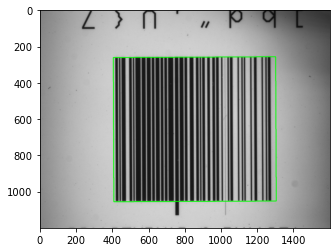

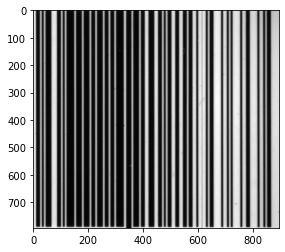

In [5]:
bound_box(f'../images/{images_paths[0]}')

[[ 352.  288.]
 [1252.  288.]
 [ 352. 1086.]
 [1252. 1086.]]


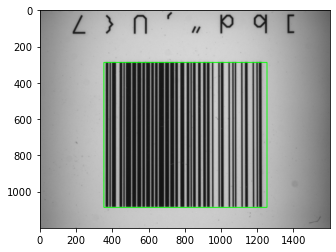

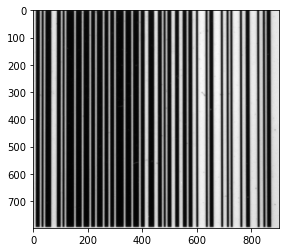

In [6]:
bound_box(f'../images/{images_paths[1]}')

[[ 201.  242.]
 [1047.  237.]
 [ 204.  726.]
 [1050.  721.]]


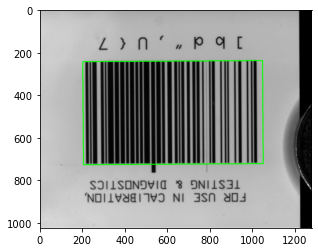

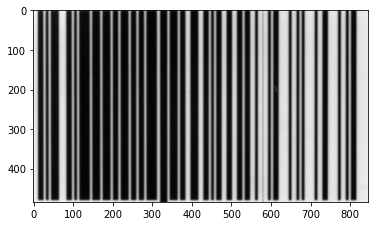

In [7]:
bound_box(f'../images/{images_paths[2]}')

[[131. 257.]
 [977. 257.]
 [131. 741.]
 [977. 741.]]


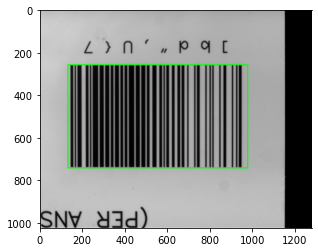

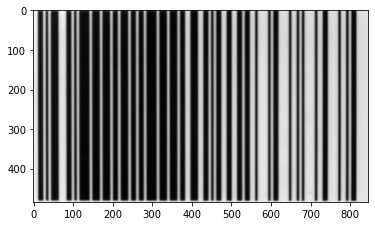

In [8]:
bound_box(f'../images/{images_paths[3]}')

[[329. 172.]
 [909. 172.]
 [329. 687.]
 [909. 687.]]


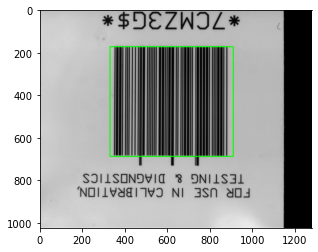

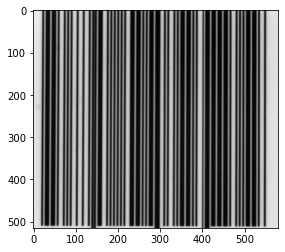

In [9]:
bound_box(f'../images/{images_paths[4]}')

[[334. 251.]
 [917. 251.]
 [334. 764.]
 [917. 764.]]


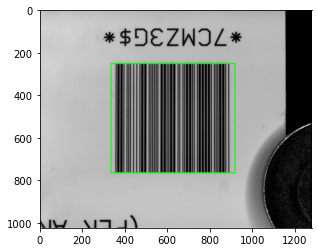

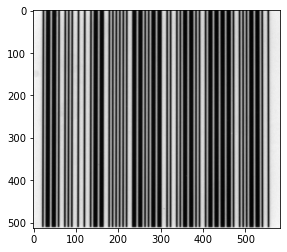

In [10]:
bound_box(f'../images/{images_paths[5]}')

[[ 161.  287.]
 [1108.  287.]
 [ 161.  802.]
 [1108.  802.]]


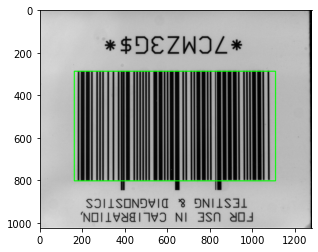

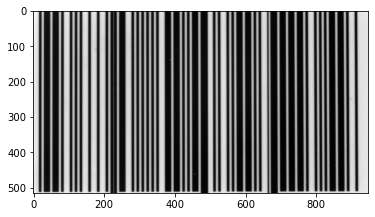

In [11]:
bound_box(f'../images/{images_paths[6]}')

[[ 146.  274.]
 [1098.  276.]
 [ 145.  789.]
 [1097.  791.]]


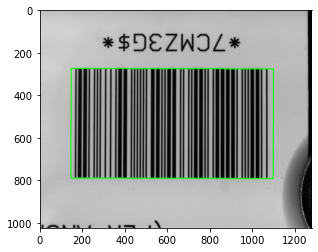

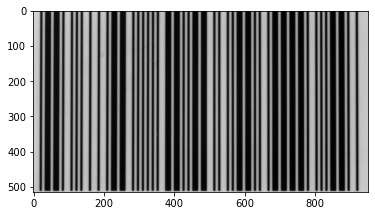

In [12]:
bound_box(f'../images/{images_paths[7]}')

[[327. 335.]
 [982. 341.]
 [322. 779.]
 [977. 786.]]


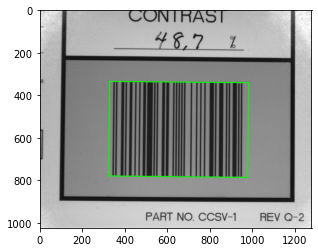

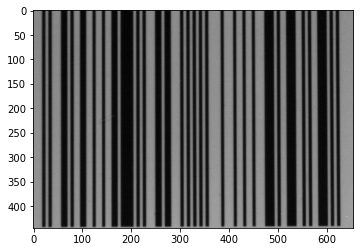

In [13]:
bound_box(f'../images/{images_paths[8]}')

[[337. 280.]
 [986. 285.]
 [333. 721.]
 [982. 727.]]


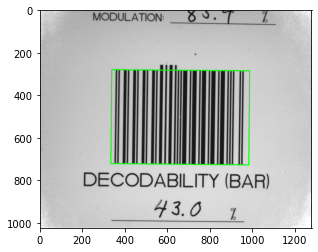

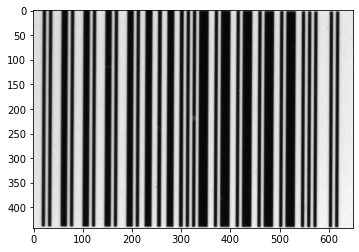

In [14]:
bound_box(f'../images/{images_paths[9]}')

In [15]:
print(f'../images/{images_paths[10]}')

images/EAN-UPC-DEFECTS IMGB.BMP


In [16]:
bound_box(f'../images/{images_paths[10]}')

IndexError: list index out of range

[[263. 315.]
 [963. 315.]
 [263. 757.]
 [963. 757.]]


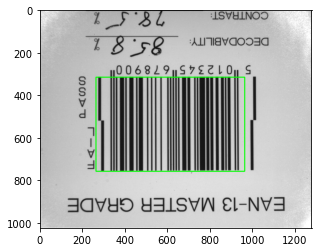

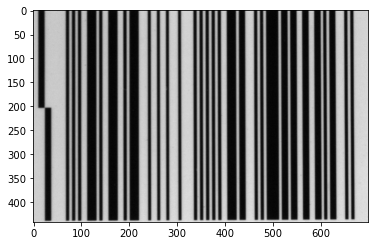

In [17]:
bound_box(f'../images/{images_paths[11]}')

In [18]:
bound_box(f'../images/{images_paths[12]}')

IndexError: list index out of range

[[ 101.  120.]
 [1301.  120.]
 [ 101.  312.]
 [1301.  312.]]


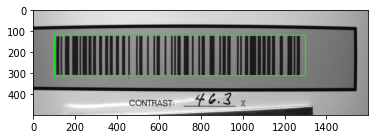

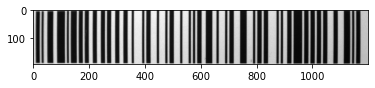

In [19]:
bound_box(f'../images/{images_paths[13]}')

[[ 164.  145.]
 [1358.  146.]
 [ 164.  336.]
 [1358.  336.]]


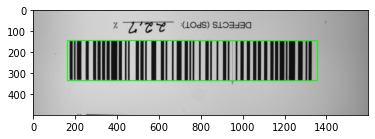

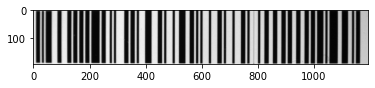

In [20]:
bound_box(f'../images/{images_paths[14]}')

[[ 178.  167.]
 [1391.  154.]
 [ 181.  363.]
 [1393.  350.]]


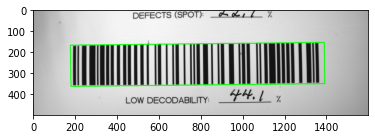

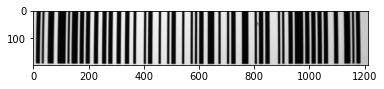

In [21]:
bound_box(f'../images/{images_paths[15]}')

[[ 202.  140.]
 [1398.  141.]
 [ 202.  332.]
 [1398.  332.]]


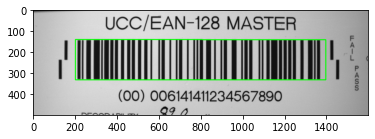

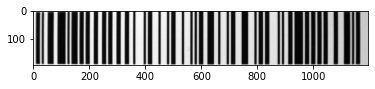

In [22]:
bound_box(f'../images/{images_paths[16]}')

[[ 193.  145.]
 [1359.  127.]
 [ 197.  384.]
 [1363.  366.]]


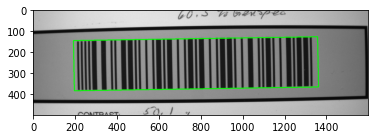

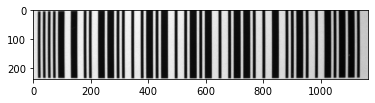

In [23]:
bound_box(f'../images/{images_paths[17]}')

[[ 195.  128.]
 [1365.  119.]
 [ 197.  371.]
 [1367.  361.]]


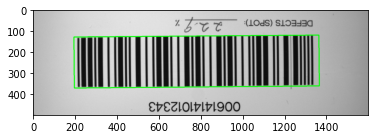

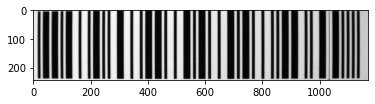

In [24]:
bound_box(f'../images/{images_paths[18]}')

[[ 228.   58.]
 [1394.   59.]
 [ 227.  298.]
 [1393.  300.]]


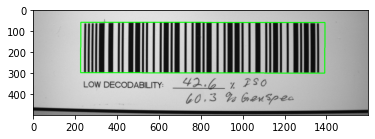

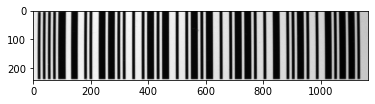

In [25]:
bound_box(f'../images/{images_paths[19]}')

[[ 246.  141.]
 [1415.  131.]
 [ 248.  383.]
 [1417.  373.]]


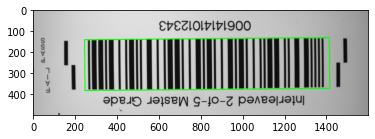

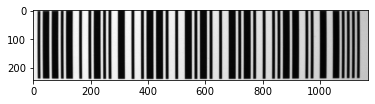

In [26]:
bound_box(f'../images/{images_paths[20]}')

In [27]:
print(f'../images/{images_paths[21]}')

images/TestChart.xls


In [28]:
bound_box(f'../images/{images_paths[21]}')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


[[179. 242.]
 [884. 237.]
 [182. 644.]
 [887. 639.]]


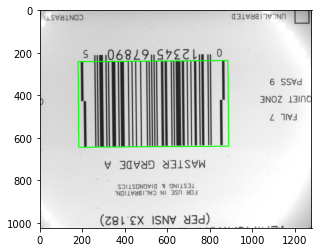

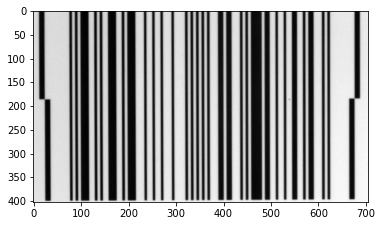

In [29]:
bound_box(f'../images/{images_paths[22]}')

[[308. 336.]
 [903. 340.]
 [305. 737.]
 [900. 741.]]


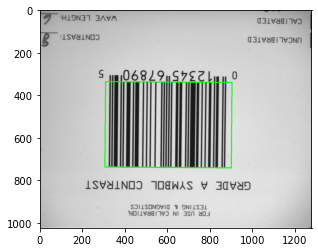

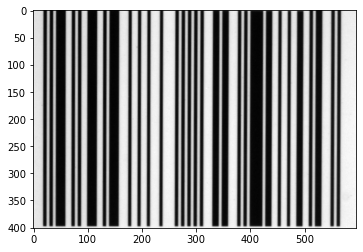

In [30]:
bound_box(f'../images/{images_paths[23]}')

[[340. 333.]
 [934. 340.]
 [335. 732.]
 [929. 739.]]


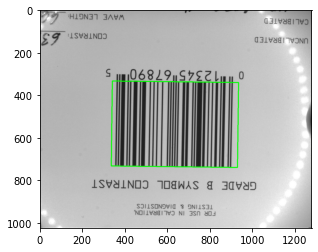

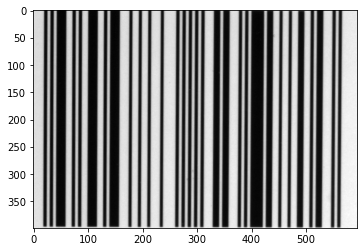

In [31]:
bound_box(f'../images/{images_paths[24]}')

[[349. 335.]
 [943. 335.]
 [349. 736.]
 [943. 736.]]


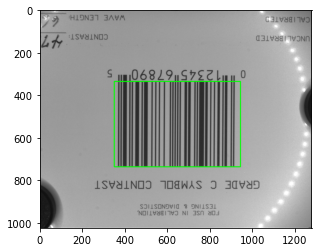

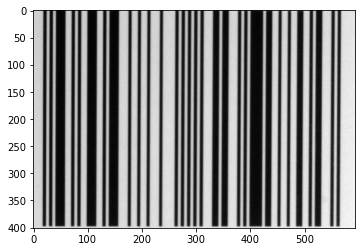

In [32]:
bound_box(f'../images/{images_paths[25]}')

In [33]:
bound_box(f'../images/{images_paths[26]}')

IndexError: list index out of range

[[321. 332.]
 [916. 333.]
 [321. 725.]
 [916. 725.]]


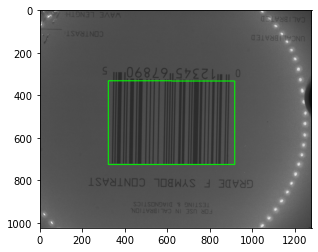

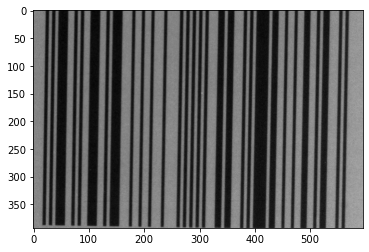

In [34]:
bound_box(f'../images/{images_paths[27]}')

[[319. 327.]
 [915. 332.]
 [315. 727.]
 [911. 733.]]


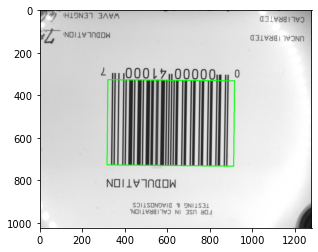

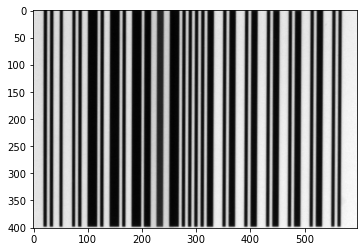

In [35]:
bound_box(f'../images/{images_paths[28]}')

[[319. 331.]
 [914. 340.]
 [313. 731.]
 [908. 741.]]


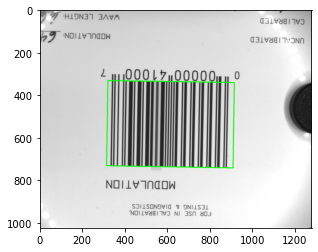

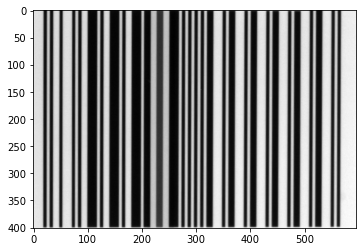

In [36]:
bound_box(f'../images/{images_paths[29]}')

[[312. 353.]
 [910. 353.]
 [312. 745.]
 [910. 745.]]


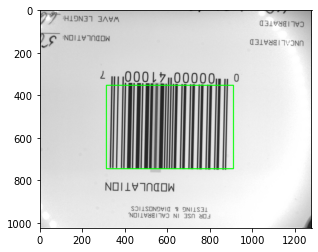

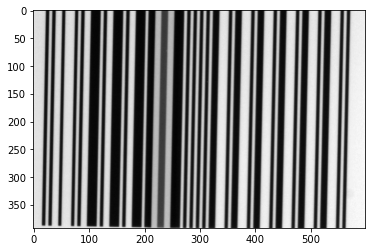

In [37]:
bound_box(f'../images/{images_paths[30]}')

In [38]:
bound_box(f'../images/{images_paths[31]}')

IndexError: list index out of range

[[327. 321.]
 [921. 321.]
 [327. 723.]
 [921. 723.]]


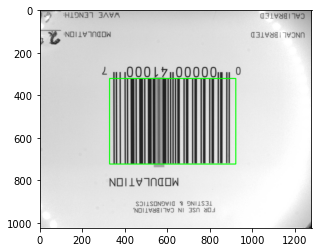

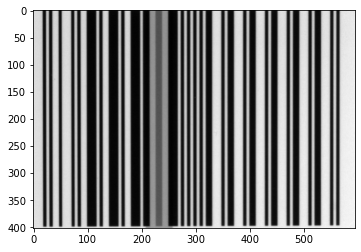

In [39]:
bound_box(f'../images/{images_paths[32]}')

[[337. 329.]
 [931. 331.]
 [336. 731.]
 [930. 733.]]


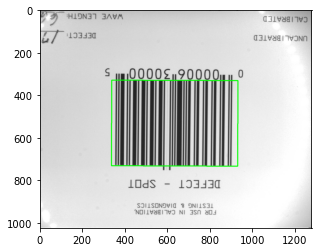

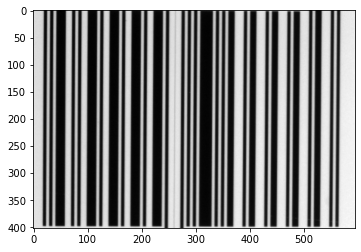

In [40]:
bound_box(f'../images/{images_paths[34]}')

[[337. 320.]
 [932. 326.]
 [332. 720.]
 [927. 726.]]


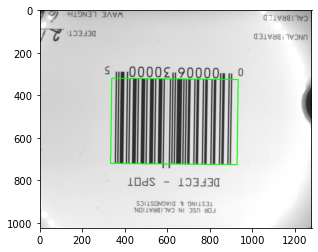

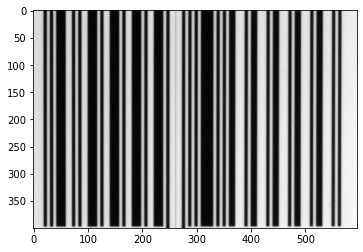

In [41]:
bound_box(f'../images/{images_paths[35]}')

[[326. 323.]
 [919. 323.]
 [326. 724.]
 [919. 724.]]


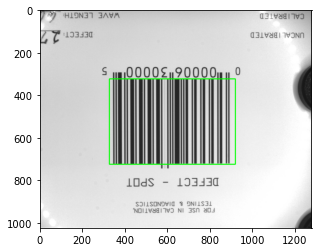

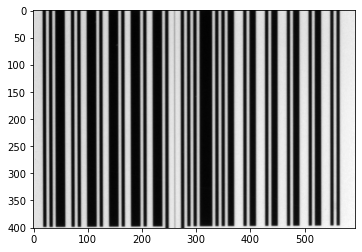

In [42]:
bound_box(f'../images/{images_paths[36]}')

[[313. 330.]
 [907. 330.]
 [313. 731.]
 [907. 731.]]


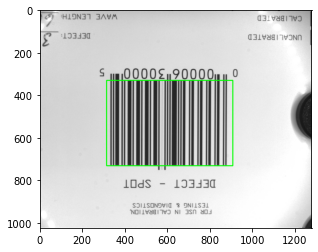

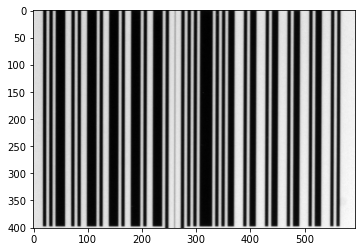

In [43]:
bound_box(f'../images/{images_paths[37]}')

[[324. 331.]
 [920. 331.]
 [324. 733.]
 [920. 733.]]


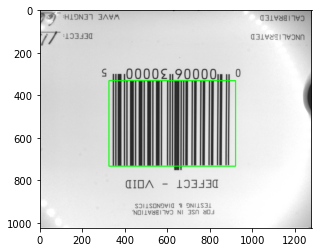

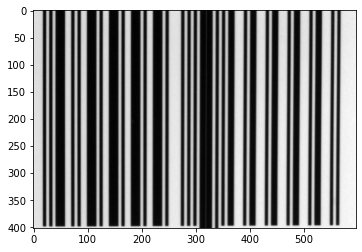

In [44]:
bound_box(f'../images/{images_paths[38]}')

[[327. 323.]
 [923. 327.]
 [324. 725.]
 [920. 729.]]


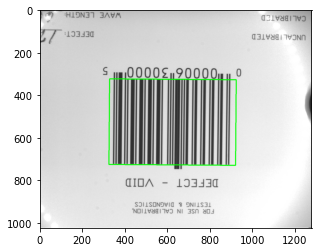

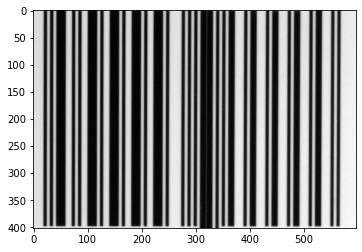

In [45]:
bound_box(f'../images/{images_paths[39]}')

[[292. 333.]
 [887. 333.]
 [292. 734.]
 [887. 734.]]


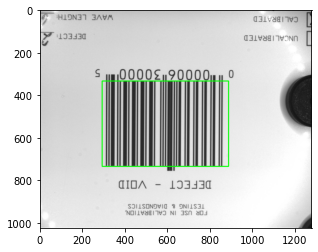

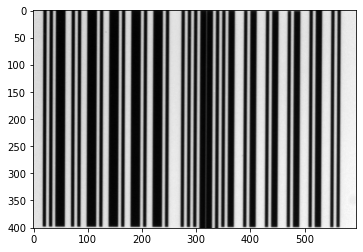

In [46]:
bound_box(f'../images/{images_paths[40]}')

[[282. 325.]
 [878. 322.]
 [283. 726.]
 [879. 724.]]


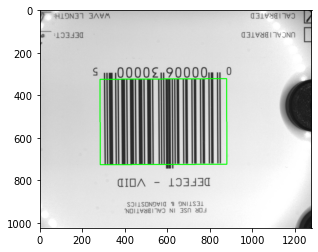

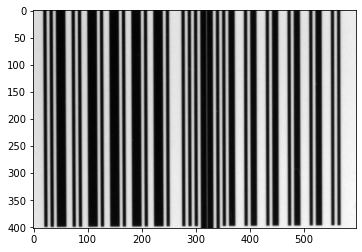

In [47]:
bound_box(f'../images/{images_paths[41]}')

[[280. 323.]
 [875. 323.]
 [280. 724.]
 [875. 724.]]


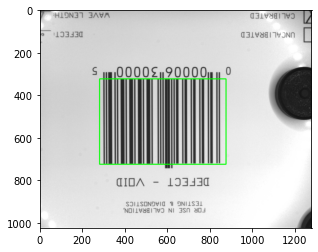

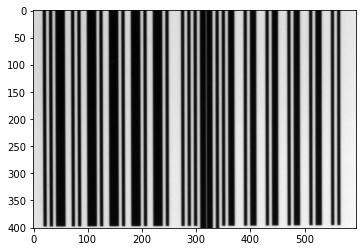

In [48]:
bound_box(f'../images/{images_paths[42]}')

[[273. 317.]
 [868. 318.]
 [273. 719.]
 [868. 719.]]


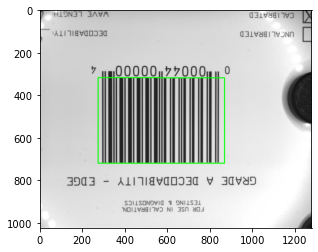

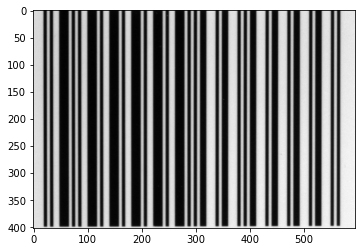

In [49]:
bound_box(f'../images/{images_paths[43]}')

[[283. 323.]
 [879. 327.]
 [281. 725.]
 [877. 729.]]


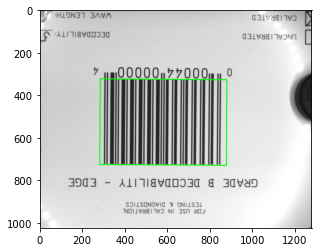

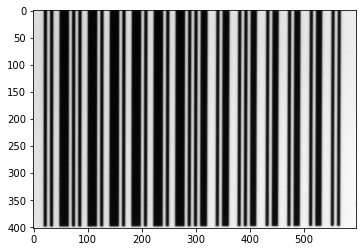

In [50]:
bound_box(f'../images/{images_paths[44]}')

[[273. 336.]
 [868. 338.]
 [271. 737.]
 [866. 740.]]


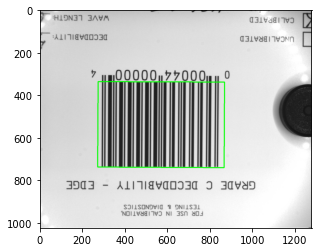

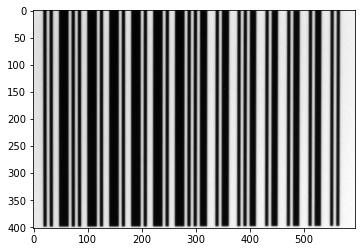

In [51]:
bound_box(f'../images/{images_paths[45]}')

[[257. 324.]
 [852. 332.]
 [252. 726.]
 [847. 734.]]


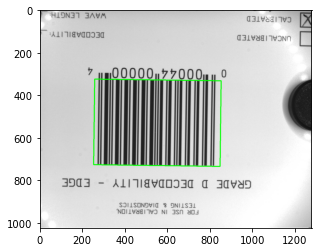

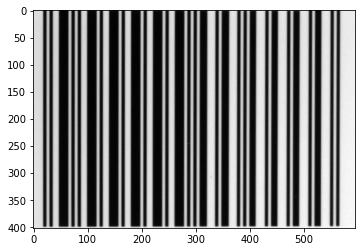

In [52]:
bound_box(f'../images/{images_paths[46]}')

[[251. 333.]
 [847. 337.]
 [248. 735.]
 [845. 739.]]


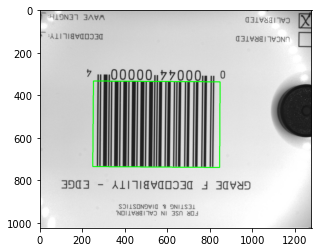

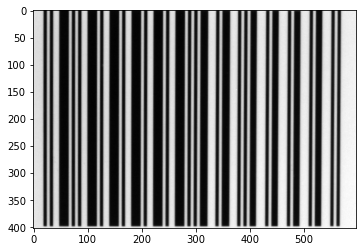

In [53]:
bound_box(f'../images/{images_paths[47]}')

[[245. 331.]
 [841. 338.]
 [240. 732.]
 [837. 739.]]


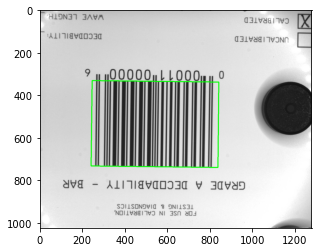

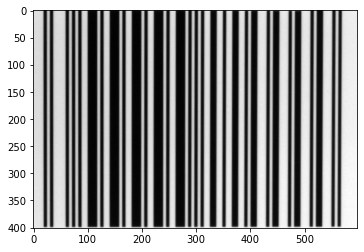

In [54]:
bound_box(f'../images/{images_paths[48]}')

[[249. 332.]
 [846. 339.]
 [244. 734.]
 [841. 741.]]


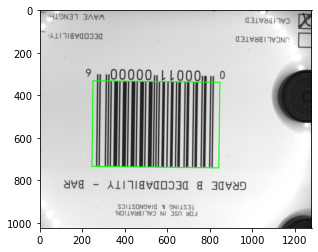

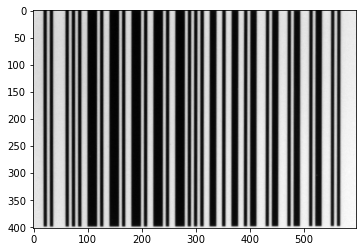

In [55]:
bound_box(f'../images/{images_paths[49]}')

[[273. 310.]
 [869. 316.]
 [269. 712.]
 [865. 717.]]


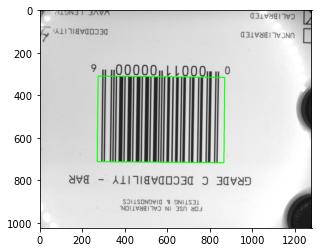

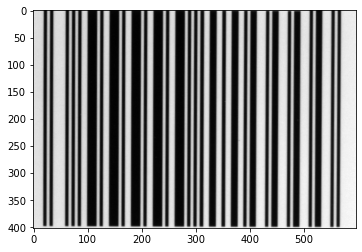

In [56]:
bound_box(f'../images/{images_paths[50]}')

[[276. 319.]
 [872. 328.]
 [270. 721.]
 [866. 729.]]


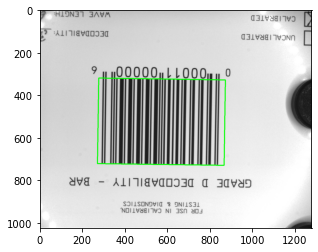

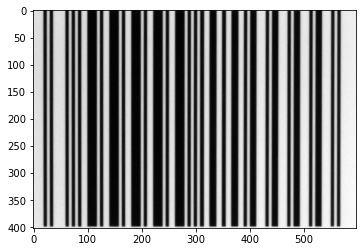

In [57]:
bound_box(f'../images/{images_paths[51]}')

[[290. 323.]
 [885. 323.]
 [290. 725.]
 [885. 725.]]


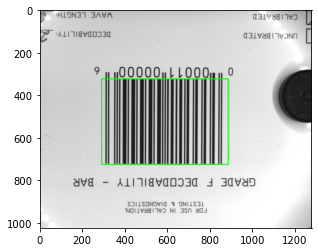

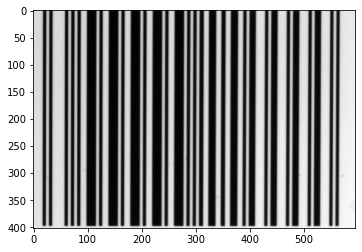

In [58]:
bound_box(f'../images/{images_paths[52]}')